In [2]:
%load_ext autoreload
%autoreload 2

from common import State, Node, Tree, Object, Robot, Environment
import random

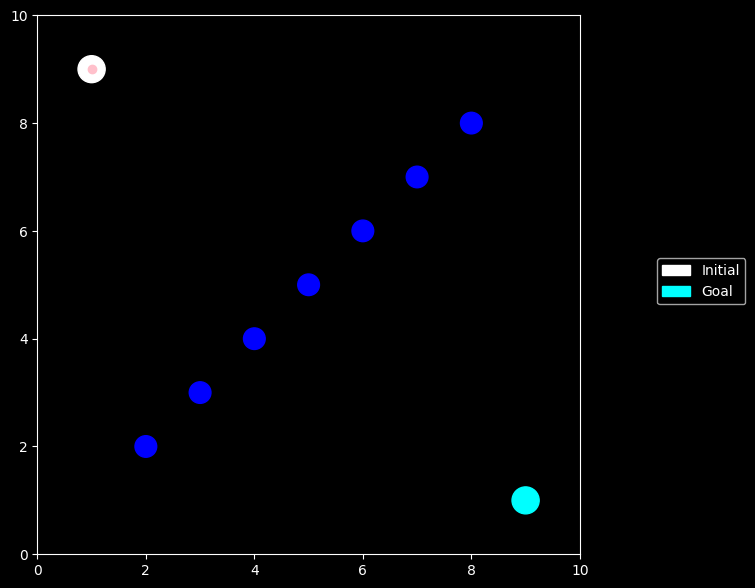

Goal reached


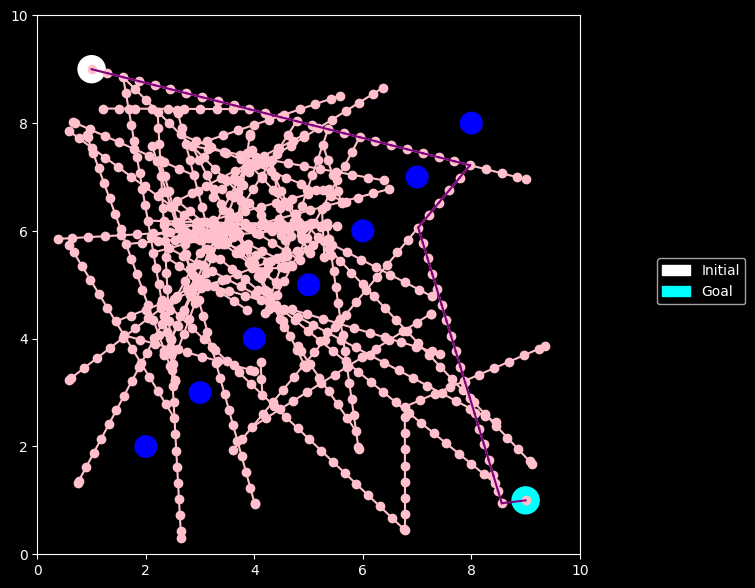

In [49]:
class NaiveSolver:
    def __init__(self, tree: Tree, env: Environment, robot: Robot, step_size: float = 0.1, max_iter: int = 1000):
        self.tree = tree
        self.env = env
        self.robot = robot
        self.step_size = step_size
        self.max_iter = max_iter

    def solve(self):
        for i in range(self.max_iter):
            found_path = self.step()
            if found_path is not None:
                self.env.draw(self.tree, found_path)
                break

    
    def extend(self, tree_node: Node, rand_state: State):
        tree_state = tree_node.state
        distance = (tree_state - rand_state).norm()
        max_step = distance // self.step_size
        states = [
            tree_state + (rand_state - tree_state) / distance * self.step_size * (i + 1) for i in range(0, int(max_step))
        ] + [rand_state]
        valid_states = []
        for state in states:
            self.robot.set_state(state)
            if self.env.check_collision(self.robot):
                break
            valid_states.append(state)

        parent = tree_node
        new_nodes = []
        for state in valid_states:
            node = Node(state, parent)
            self.tree.add(node)
            parent = node
            new_nodes.append(node)
        return new_nodes

    def check_goal(self, nodes: list[Node]):
        for node in nodes:
            self.robot.set_state(node.state)
            if self.env.reached_goal(self.robot):
                return node
        return None

    def step(self):
        def select_random_node(nodes):
            return random.choice(nodes)
        
        rand_state = self.env.generate_random_state(self.robot)
        tree_node = self.tree.select_node(select_random_node)
        new_nodes = self.extend(tree_node, rand_state)
        dest_node =  self.check_goal(new_nodes)
        if dest_node is not None:
            print("Goal reached")
            return self.tree.get_path(dest_node)
        return None

env = Environment.dummy()
init_state, goal_state = env.init_state, env.goal_state
tree = Tree(init_state)
env.draw(tree)

solver = NaiveSolver(tree, env, Robot(0.25, State(1, 1)), step_size=0.3, max_iter=100)
solver.solve()

In [167]:
2.1 // 0.5

4.0

In [ ]:
2.5 3 3.5 4